In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests
!conda install -c anaconda lxml --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    libxml2-2.9.10             |       he19cac6_1         1.3 MB  anaconda
    libxslt-1.1.34             |       hc22bd24_0         573 KB  anaconda
    lxml-4.5.2                 |   py36hefd8a0e_0         1.4 MB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         7.3 MB

The following NEW packages will be INSTALLED:

  libxslt            anaconda/linux-64::libxslt-1.1.34-hc22bd24_0
  lxml           

# Arcadia and Monterey Park Crime Analysis

In [2]:
# Read the crime data
url="https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-6/table-6-state-cuts/california.xls"
r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = df_list[0]
print(df.shape)

(461, 13)


In [3]:
df.head()

,City,Population,Violentcrime,Murder andnonnegligentmanslaughter,Rape(reviseddefinition1),Rape(legacydefinition2),Robbery,Aggravatedassault,Propertycrime,Burglary,Larceny-theft,Motorvehicletheft,Arson
0,Adelanto,33479,276,1,28,NaN,48,199,560,241,218,101,15
1,Agoura Hills,21032,15,0,2,NaN,3,10,253,83,150,20,0
2,Alameda,79597,151,1,8,NaN,68,74,2020,226,1351,443,29
3,Albany,19975,29,0,0,NaN,24,5,533,62,426,45,3
4,Alhambra,86035,146,0,9,NaN,73,64,2107,422,1447,238,4


In [4]:
# Drop the rape (definition 2) since the column contain NaN
df.drop('Rape(legacydefinition2)', axis=1, inplace=True)

In [5]:
#Rename the columns
df.rename(columns={"Violentcrime": "Violent Crime", "Murder andnonnegligentmanslaughter":
                   "Murder & Nonnegligent Manslaughter","Rape(reviseddefinition1)":"Rape", 
                   "Aggravatedassault":"Aggravated Assault","Propertycrime":"Property Crime",
                   "Motorvehicletheft":"Motor Vehicle Theft"}, inplace=True)

In [6]:
#Check if column is string
all(isinstance(column, str) for column in df.columns)

True

In [7]:
#Get Arcadia data
ac = df.loc[df['City'] == 'Arcadia']
ac

,City,Population,Violent Crime,Murder & Nonnegligent Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft,Arson
13,Arcadia,58816,83,2,4,44,33,1642,520,1045,77,5


In [8]:
# Get Monterey Park Data
mp = df.loc[df['City'] == 'Monterey Park']
mp

,City,Population,Violent Crime,Murder & Nonnegligent Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft,Arson
260,Monterey Park,61710,131,1,8,59,63,1704,460,998,246,1


In [9]:
# Set city as index
df.set_index("City", inplace=True)
df.head()

,Population,Violent Crime,Murder & Nonnegligent Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft,Arson
City,,,,,,,,,,,
Adelanto,33479,276,1,28,48,199,560,241,218,101,15
Agoura Hills,21032,15,0,2,3,10,253,83,150,20,0
Alameda,79597,151,1,8,68,74,2020,226,1351,443,29
Albany,19975,29,0,0,24,5,533,62,426,45,3
Alhambra,86035,146,0,9,73,64,2107,422,1447,238,4


In [10]:
# Set incidents
incidents=["Violent Crime","Murder & Nonnegligent Manslaughter","Rape", "Robbery", 
                   "Aggravated Assault","Property Crime", "Burglary", "Larceny-theft", "Motor Vehicle Theft","Arson"]

In [11]:
# Get Arcadia incidents and multiply by 10000/(Arcadia population) to get incidents per 10,000
df_ac = df.loc['Arcadia', incidents]
df_ac=df_ac*10000/58816
df_ac=df_ac.round(decimals=0)
df_ac

Violent Crime                          14.0
Murder & Nonnegligent Manslaughter      0.0
Rape                                    1.0
Robbery                                 7.0
Aggravated Assault                      6.0
Property Crime                        279.0
Burglary                               88.0
Larceny-theft                         178.0
Motor Vehicle Theft                    13.0
Arson                                   1.0
Name: Arcadia, dtype: float64

In [12]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


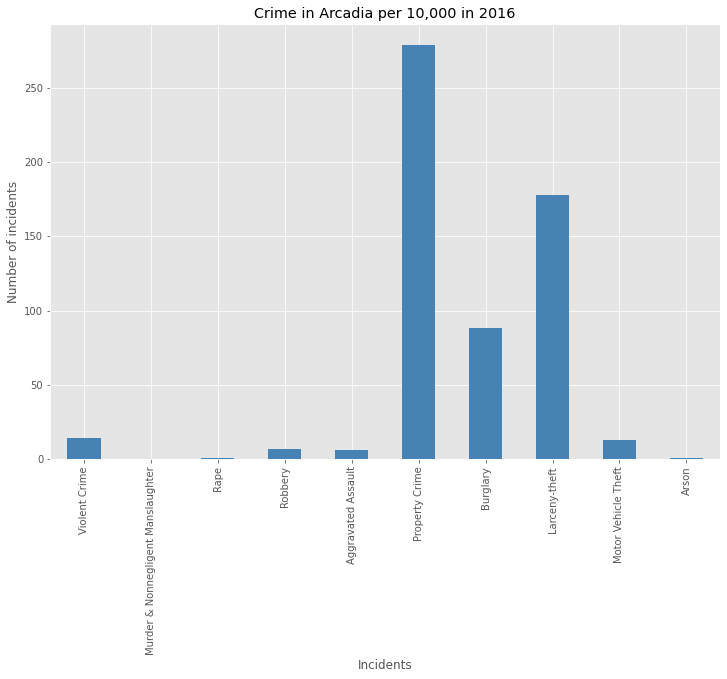

In [13]:
# Bar plot of crime in Arcadia
df_ac.plot(kind='bar', figsize=(12, 8),color='steelblue')

plt.xlabel('Incidents') # add to x-label to the plot
plt.ylabel('Number of incidents') # add y-label to the plot
plt.title('Crime in Arcadia per 10,000 in 2016') # add title to the plot

plt.show()

In [14]:
# Get Monterey Park incidents and multiply by 10000/(Monterey Park population) to get incidents per 10,000
df_mp = df.loc['Monterey Park', incidents]
df_mp=df_mp*10000/61710
df_mp=df_mp.round(decimals=0)
df_mp

Violent Crime                          21.0
Murder & Nonnegligent Manslaughter      0.0
Rape                                    1.0
Robbery                                10.0
Aggravated Assault                     10.0
Property Crime                        276.0
Burglary                               75.0
Larceny-theft                         162.0
Motor Vehicle Theft                    40.0
Arson                                   0.0
Name: Monterey Park, dtype: float64

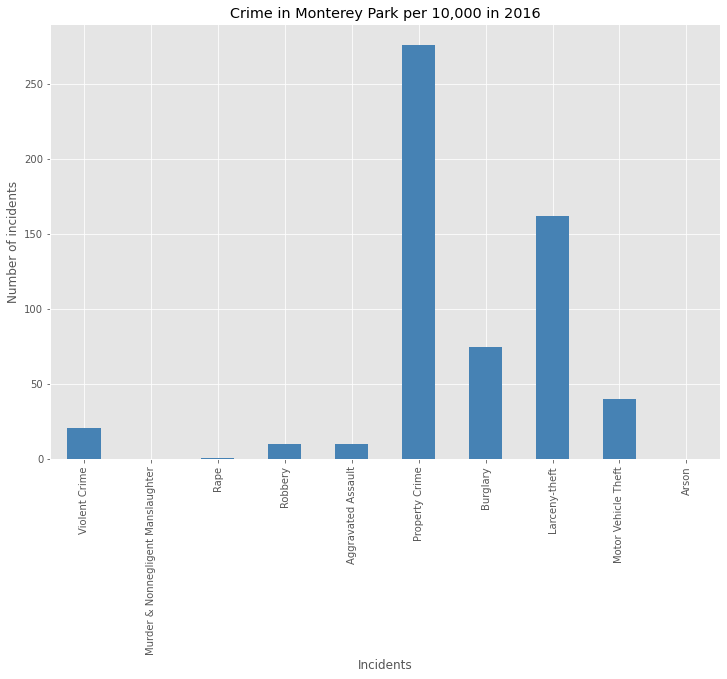

In [15]:
# Bar plot of crime in Monterey Park
df_mp.plot(kind='bar', figsize=(12, 8), color='steelblue')

plt.xlabel('Incidents') # add to x-label to the plot
plt.ylabel('Number of incidents') # add y-label to the plot
plt.title('Crime in Monterey Park per 10,000 in 2016') # add title to the plot

plt.show()

In [16]:
# Combine Arcadia and Monterey Park incidents and transpose it
ac_mp = df.loc[['Arcadia', 'Monterey Park'], incidents].transpose()
ac_mp

City,Arcadia,Monterey Park
Violent Crime,83,131
Murder & Nonnegligent Manslaughter,2,1
Rape,4,8
Robbery,44,59
Aggravated Assault,33,63
Property Crime,1642,1704
Burglary,520,460
Larceny-theft,1045,998
Motor Vehicle Theft,77,246
Arson,5,1


In [17]:
# Get each city incidents and multiply by 10000/(each city population) to get incidents per 10,000
ac_mp["Arcadia"] = 10000/58816 * ac_mp["Arcadia"]
ac_mp["Monterey Park"] = 10000/61710 * ac_mp["Arcadia"]
ac_mp

City,Arcadia,Monterey Park
Violent Crime,14.111806,2.286794
Murder & Nonnegligent Manslaughter,0.340044,0.055103
Rape,0.680087,0.110207
Robbery,7.480958,1.212276
Aggravated Assault,5.610718,0.909207
Property Crime,279.175734,45.239950
Burglary,88.411317,14.326903
Larceny-theft,177.672742,28.791564
Motor Vehicle Theft,13.091676,2.121484
Arson,0.850109,0.137759


In [18]:
# Round the above data
ac_mp=ac_mp.round(decimals=0)
ac_mp

City,Arcadia,Monterey Park
Violent Crime,14.0,2.0
Murder & Nonnegligent Manslaughter,0.0,0.0
Rape,1.0,0.0
Robbery,7.0,1.0
Aggravated Assault,6.0,1.0
Property Crime,279.0,45.0
Burglary,88.0,14.0
Larceny-theft,178.0,29.0
Motor Vehicle Theft,13.0,2.0
Arson,1.0,0.0


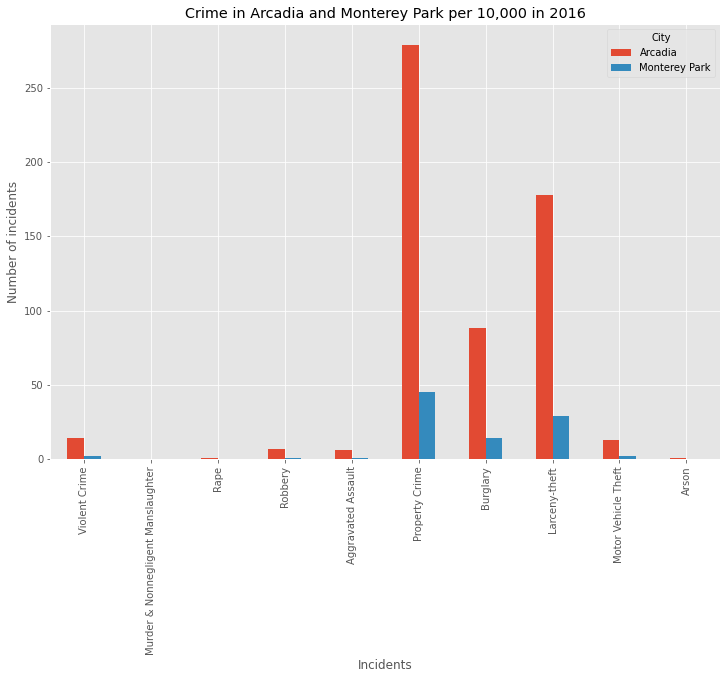

In [19]:
# Plot both the Arcadia and Montery Park side by side
ac_mp.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Incidents') # add to x-label to the plot
plt.ylabel('Number of incidents') # add y-label to the plot
plt.title('Crime in Arcadia and Monterey Park per 10,000 in 2016') # add title to the plot

plt.show()

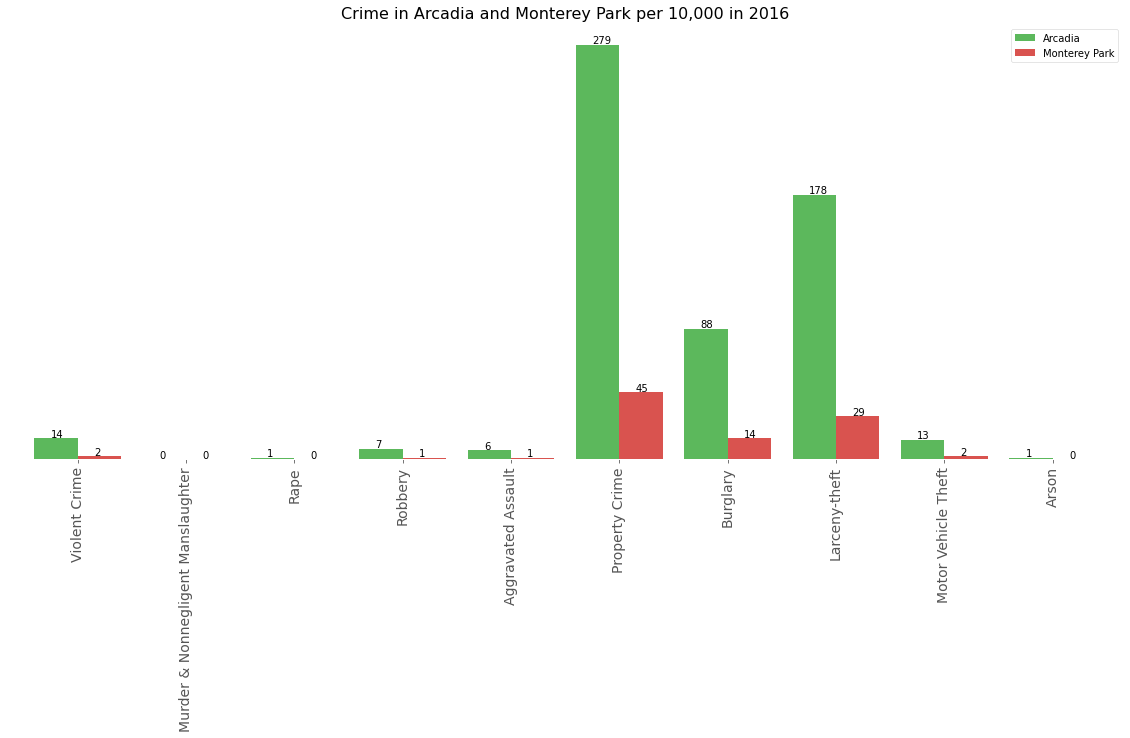

In [20]:
# Plot both the Arcadia and Montery Park side by side
ax = ac_mp.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#5cb85c', '#d9534f'),
                fontsize = 14
                )

ax.set_title("Crime in Arcadia and Monterey Park per 10,000 in 2016", fontsize = 16)

ax.legend(fontsize = 14)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.patch.set_facecolor('white')
ax.legend(facecolor='white', framealpha=1)

ax.tick_params(left=False, labelleft=False)
for p in ax.patches:
    ax.annotate("{:.0f}".format(1*p.get_height()),
                xy=(p.get_x()+0.15, p.get_height()+1))
   # _ = ax.set_yticklabels(map('{:.0f}%'.format, ax.yaxis.get_majorticklocs()))